<a href="https://colab.research.google.com/github/phyophyosanmm/carpriceprediction/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nehalbirla_vehicle_cardekho_path = kagglehub.dataset_download('nehalbirla/vehicle-dataset-from-cardekho')

print('Data source import complete.')

Using Colab cache for faster access to the 'vehicle-dataset-from-cardekho' dataset.
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:

#import train dataset
df_car = pd.read_csv(f"{nehalbirla_vehicle_cardekho_path}/car data.csv")

# EDA

Load Data

In [ ]:
df_car.shape #Checking the number of rows and columns

(301, 9)

In [ ]:
df_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df_car.info() #getting some information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Check Missing Value

In [ ]:
df_car.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
df_car.duplicated().sum() #Chedcking the duplicated row

np.int64(2)

In [ ]:
df_car.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Univariate

Distribution of one categorical variable

In [ ]:
print(df_car['Fuel_Type'].value_counts())
print(df_car['Seller_Type'].value_counts())
print(df_car['Transmission'].value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Viaualization for distributation of categorical data

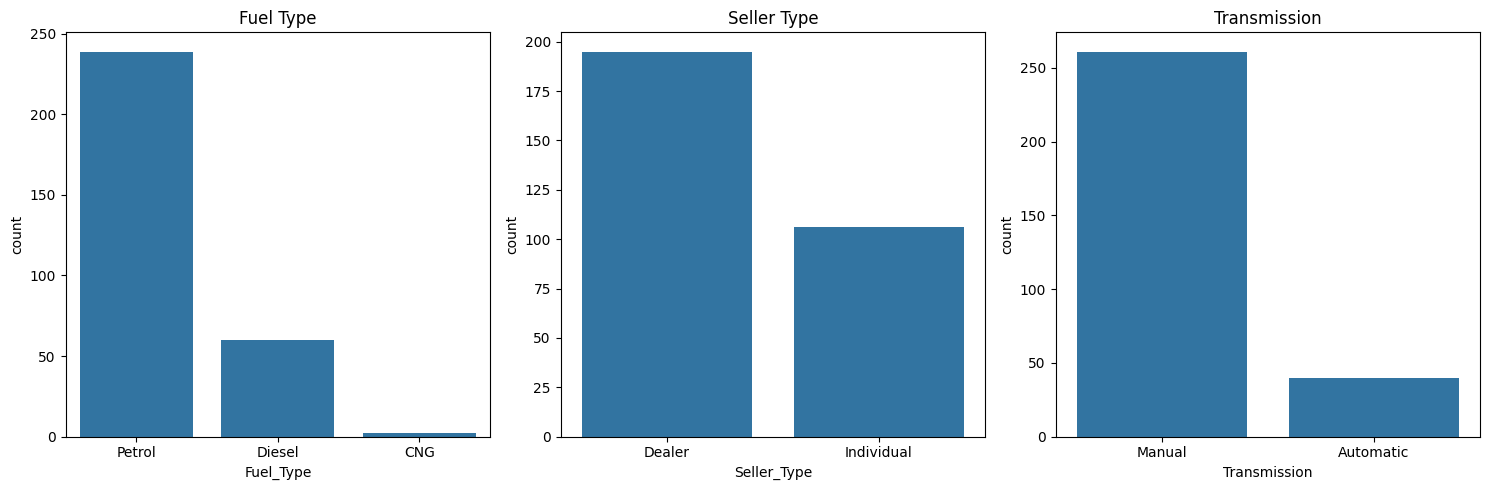

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1) # Create a subplot layout with 1 row and 3 columns.This is the 1st plot position.
sns.countplot(x='Fuel_Type', data=df_car) # create countplot
plt.title("Fuel Type")# Add a title to this subplot.

plt.subplot(1,3,2) # Create a subplot layout with 1 row and 3 columns. This is the 2nd plot position
sns.countplot(x='Seller_Type', data=df_car) #create countplot
plt.title("Seller Type")# Add a title to this subplot.

plt.subplot(1,3,3) # Create a subplot layout with 1 row and 3 columns. This is the 3rd plot position.
sns.countplot(x='Transmission', data=df_car) #Create countplot
plt.title("Transmission")# Add a title to this subplot.

plt.tight_layout()
plt.show()

- Most vehicles use petrol, with diesel next and very few running on CNG.
- Dealers list more vehicles than individual sellers.
- Manual transmission cars are far more common than automatic ones.


Univariate for Numerical Variables







In [ ]:
print(df_car['Selling_Price'].describe())
print(df_car['Present_Price'].describe())
print(df_car['Kms_Driven'].describe())
print(df_car['Year'].describe())


count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64
count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64
count       301.000000
mean      36947.205980
std       38886.883882
min         500.000000
25%       15000.000000
50%       32000.000000
75%       48767.000000
max      500000.000000
Name: Kms_Driven, dtype: float64
count     301.000000
mean     2013.627907
std         2.891554
min      2003.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: Year, dtype: float64


Visualization for Numerical variables

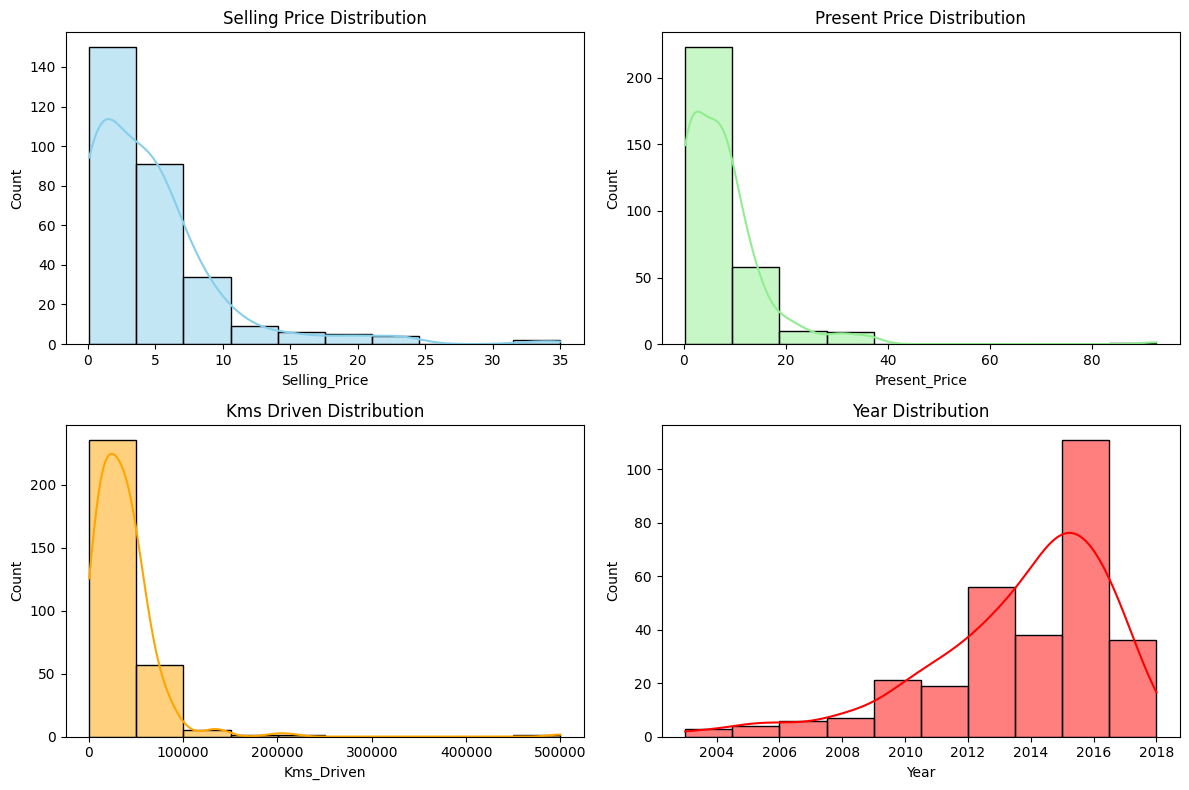

In [ ]:
plt.figure(figsize=(12,8)) #create a figure wiht with=12, height =8

#First subplot(row 1,  column 1)
plt.subplot(2,2,1) # Create a subplot layout with
sns.histplot(df_car['Selling_Price'], bins=10, color='skyblue', edgecolor='black', kde=True) #create
plt.title('Selling Price Distribution') #add title

#Second subplot(row 1, column 2)
plt.subplot(2,2,2)
sns.histplot(df_car['Present_Price'], bins=10, color='lightgreen', edgecolor='black', kde=True)
plt.title('Present Price Distribution')

#Third subplot(row 2, column1)
plt.subplot(2,2,3)
sns.histplot(df_car['Kms_Driven'], bins=10, color='orange', edgecolor='black', kde=True)
plt.title('Kms Driven Distribution')

#Fourth subplot (row 2, column 2)
plt.subplot(2,2,4)
sns.histplot(df_car['Year'], bins=10, color='red', edgecolor='black', kde=True)
plt.title('Year Distribution')

plt.tight_layout()
plt.show()

• 	Most cars in the dataset are sold at prices below 10 units, showing affordability as a key trend.
• 	Present prices cluster below 20 units, suggesting limited high-value vehicles.
• 	Cars are usually driven under 100,000 km and most were manufactured around 2015, reflecting relatively recent, moderately used vehicles

Bivariate

Numerical & Numerical

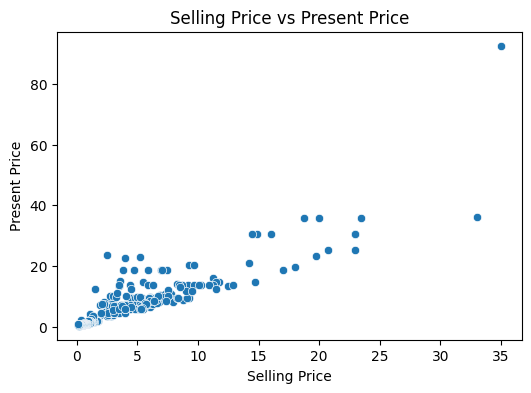

In [ ]:
#Scatter plot: Selling Price vs Present Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='Selling_Price', y='Present_Price', data=df_car)
plt.title('Selling Price vs Present Price')
plt.xlabel('Selling Price')
plt.ylabel('Present Price')
plt.show()



This scatter plot shows a clear positive relationship between selling price and present price:
• 	Most cars cluster at lower values, meaning both selling and present prices are relatively modest.
• 	A few outliers stand out with very high present prices compared to selling prices, suggesting premium or luxury vehicles.
• 	Overall, the trend indicates that higher present prices generally align with higher selling prices, though exceptions exist.

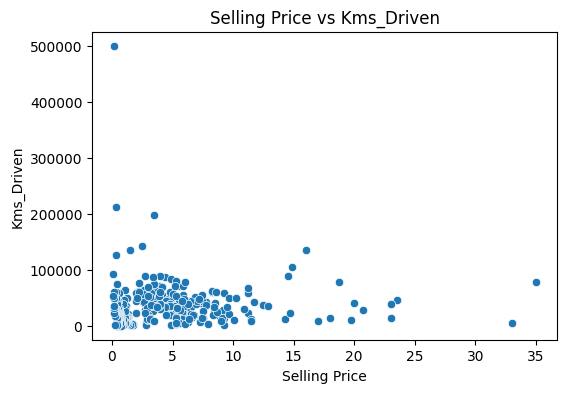

In [ ]:
#Scatter plot: Selling Price vs Kms_Driven
plt.figure(figsize=(6,4))
sns.scatterplot(x='Selling_Price', y='Kms_Driven', data=df_car)
plt.xlabel('Selling Price')
plt.ylabel('Kms_Driven')
plt.title('Selling Price vs Kms_Driven')
plt.show()



• 	Most vehicles cluster at lower selling prices and lower mileage, showing typical usage and affordability.
• 	A few outliers with very high mileage appear, but their selling prices vary widely.
• 	Overall, higher kilometers driven do not consistently reduce selling price, suggesting other factors (like brand or condition) influence value

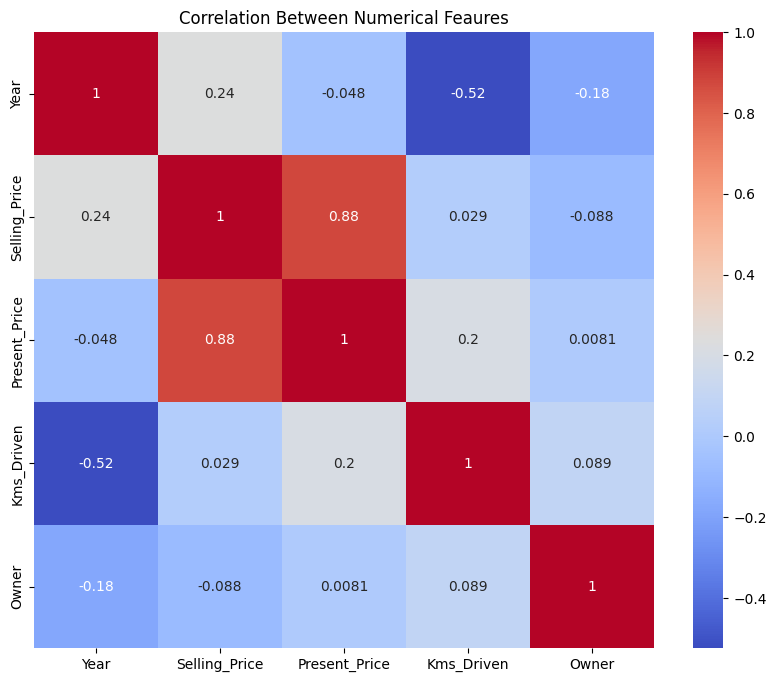

In [ ]:
# Correlation heatmap (Numerical features only)
plt.figure(figsize=(10, 8))
sns.heatmap(df_car[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Owner']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Feaures')
plt.show()

• 	Selling price and present price are strongly positively correlated (0.88), meaning higher current values usually align with higher selling prices.
• 	Year and kilometers driven have a strong negative correlation (-0.52), indicating newer cars tend to have lower mileage.
• 	Owner count shows weak correlations with all other variables, suggesting it has little direct influence on price or usage

# 2. Categorical vs Numerical

Text(0, 0.5, 'Selling_Price')

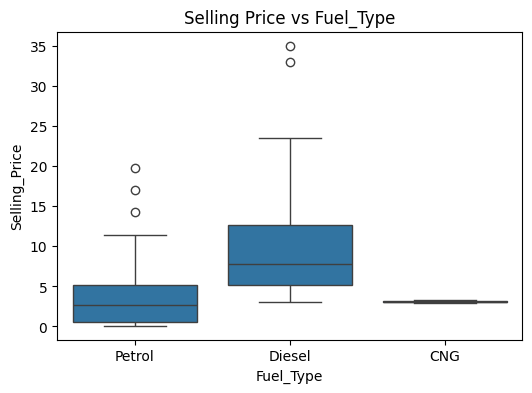

In [ ]:
#Boxplot: Selling Price vs Fuel_Type
plt.figure(figsize=(6,4))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df_car)
plt.title('Selling Price vs Fuel_Type')
plt.xlabel('Fuel_Type')
plt.ylabel('Selling_Price')

• 	Diesel cars generally command higher median prices and show the widest spread, with some very expensive outliers.
• 	Petrol cars have lower median prices, though a few outliers reach higher values.
• 	CNG cars remain consistently low-priced, with little variation across the dataset.

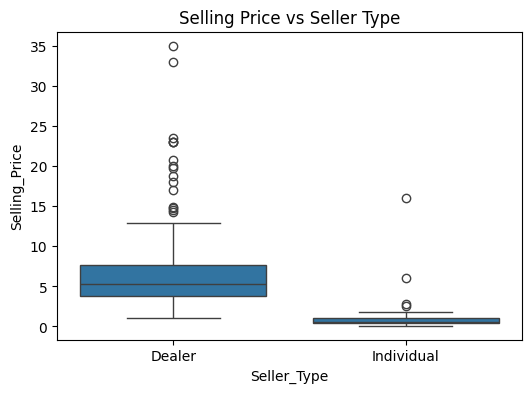

In [ ]:
# Boxplot: Selling Price vs Seller_Type
plt.figure(figsize=(6,4))
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df_car)
plt.title("Selling Price vs Seller Type")
plt.show()

• 	Dealers generally sell cars at higher median prices (around 5) and show a wide range, including many high-value outliers.
• 	Individual sellers tend to have lower median prices (below 2) with less variation.
• 	Overall, dealer listings are more expensive and more diverse in pricing compared to individual sellers.

3. Categorical vs Categorical

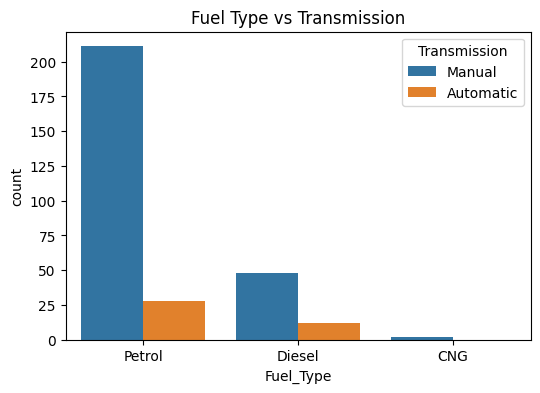

In [ ]:
# Countplot: Fuel_Type vs Transmission
plt.figure(figsize=(6,4))
sns.countplot(x='Fuel_Type', hue='Transmission', data=df_car)
plt.title("Fuel Type vs Transmission")
plt.show()

• 	Petrol cars dominate overall, with manual transmission far more common than automatic.
• 	Diesel cars also lean heavily toward manual, though in smaller numbers than petrol.
• 	CNG cars are the least represented and exclusively manual, showing no presence of automatic transmission.

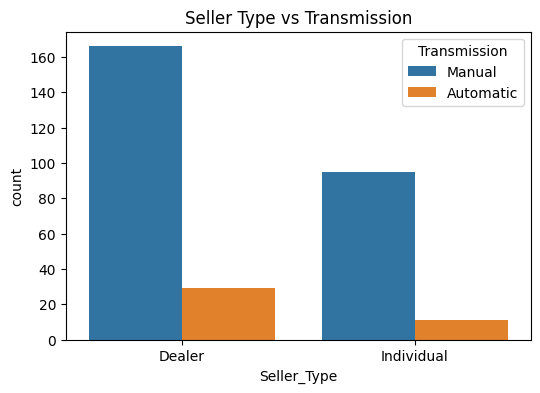

In [ ]:
# Countplot: Seller_Type vs Transmission
plt.figure(figsize=(6,4))
sns.countplot(x='Seller_Type', hue='Transmission', data=df_car)
plt.title("Seller Type vs Transmission")
plt.show()

- Dealers sell far more manual cars than automatic, showing a strong preference for manual in commercial listings.
- Individual sellers also lean heavily toward manual, though in smaller numbers overall.
- Automatic cars remain a minority in both groups, reinforcing manual transmission dominance in the dataset.




Feature Engineering

Encoding the Categorical Data



In [ ]:
#Encoding "Fuel_Type" column
df_car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding "Seller_Type" column
df_car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encoding "Transmission" Column
df_car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-134404268.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
/tmp/ipython-input-134404268.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-134404268.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-

Normalization/Scaling

In [ ]:
df_car['Current_Year'] = 2025
df_car['Car_Age'] = df_car['Current_Year'] - df_car['Year']

df_car.drop(['Year', 'Current_Year'], axis=1, inplace=True)

In [ ]:
df_car.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,3.35,5.59,27000,0,0,0,0,11
1,sx4,4.75,9.54,43000,1,0,0,0,12
2,ciaz,7.25,9.85,6900,0,0,0,0,8
3,wagon r,2.85,4.15,5200,0,0,0,0,14
4,swift,4.60,6.87,42450,1,0,0,0,11


In [ ]:
X = df_car.drop(['Car_Name','Selling_Price'],axis=1)
Y = df_car['Selling_Price']

In [ ]:
X

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,5.59,27000,0,0,0,0,11
1,9.54,43000,1,0,0,0,12
2,9.85,6900,0,0,0,0,8
3,4.15,5200,0,0,0,0,14
4,6.87,42450,1,0,0,0,11
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,9
297,5.90,60000,0,0,0,0,10
298,11.00,87934,0,0,0,0,16
299,12.50,9000,1,0,0,0,8


In [ ]:
Y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


**Split the data into training and testing sets, then apply scaling.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Scale the data (Crucial for SAGA and Lasso)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression with Cross validation
a Linear Regression model was implemented to predict the target variable using the selected input features. To ensure reliable model evaluation and avoid overfitting, both train-test split and cross-validation techniques were applied.

In [ ]:
# Cross-validation on training data
model = LinearRegression()

cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
print(cv_scores)
print("Average R square after CV:", np.mean(cv_scores) )

# model
model.fit(X_train, Y_train)

#Evaluation
y_pred = model.predict(X_test)
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared error : ", error_score)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("RMSE:", rmse)

df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred.round(2)})
print(df.head())

print("Test R2:", r2_score(Y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred)))

[0.77797672 0.86773094 0.89937591 0.78104989 0.85625465]
Average R square after CV: 0.8364776220506425
R squared error :  0.8401532365378387
RMSE: 1.713424474241971
     Actual  Predicted
99     9.65      10.39
161    0.45       0.71
89     4.75       4.26
30     3.10       4.90
232   11.45       9.84
Test R2: 0.8401532365378387
RMSE: 1.713424474241971


\Visualize the actual prices and Predicted Prices

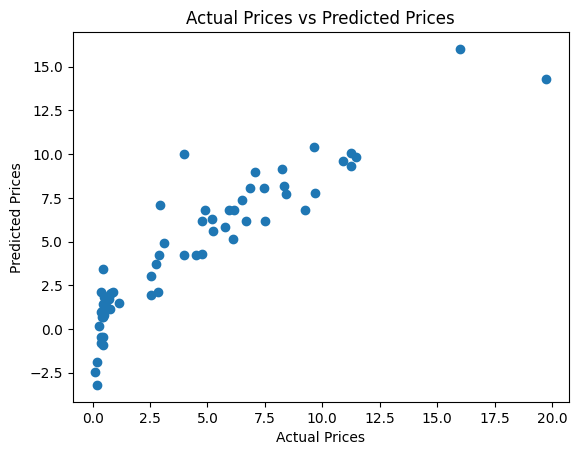

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

The regression model achieved an R² score of 0.840, indicating that approximately 85% of the variance in actual prices is explained by the model. The RMSE value of 1.71 suggests that, on average, predictions deviate from the actual prices by about 1.71 units.

# Lasso Regression

Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty).

Useful when a large number of features are involved as Lasso will eliminate many features, and reduce overfitting in the linear model.

In [ ]:
from sklearn.linear_model import Lasso
from numpy import arange
import numpy as np
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

lasso_parameters = {'alpha': np.logspace(-5, 5, 20)}

# Use the scaled training data you already created
lasso_regressor = GridSearchCV(lasso, lasso_parameters, scoring='neg_mean_squared_error', cv=30)

# FIT ONLY ON TRAIN
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=30, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.best_params_

{'alpha': np.float64(0.1623776739188721)}

In [ ]:
lasso_regressor.best_score_

np.float64(-4.315374805994775)

Evaluation on Test Set

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

best_model = lasso_regressor.best_estimator_

y_pred = best_model.predict(X_test)

df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred.round(2)})
print(df.head())

print("Test R2:", r2_score(Y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred)))

     Actual  Predicted
99     9.65      10.20
161    0.45       0.89
89     4.75       4.30
30     3.10       4.78
232   11.45       9.22
Test R2: 0.8452665328199562
RMSE: 1.6857965896311191


Visualize the actual prices and Predicted Prices

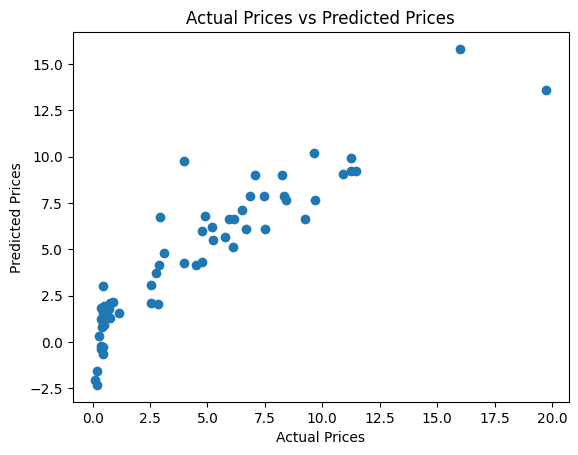

In [ ]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Random Forest Model with RandomizedSearchCV




In [ ]:
from numpy import arange
# Number of trees in random forest
n_estimators = arange(200, 2000, 100)

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = arange(10, 110, 10)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
       1300, 1400, 1500, 1600, 1700, 1800, 1900]), 'max_features': ['auto', 'sqrt'], 'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]), 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# 1. Define the model
rf_model = RandomForestRegressor(random_state=2)

rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

print("Best Parameters: ", rf_random.best_params_)
print("Best Scores: ", rf_random.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
114 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

Best Parameters:  {'n_estimators': np.int64(1900), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': np.int64(60), 'bootstrap': False}
Best Scores:  0.8974582121829314


In [ ]:
y_pred = rf_random.predict(X_test)

df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred.round(2)})
print(df.head())

print("Test R2:", r2_score(Y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred)))

     Actual  Predicted
99     9.65       8.93
161    0.45       0.53
89     4.75       4.04
30     3.10       3.29
232   11.45       8.26
Test R2: 0.8988951108291389
RMSE: 1.362696439295269


Random Forest Model with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 1. Define the model
rf_model = RandomForestRegressor(random_state=2)

# 2. Define the parameter grid
# n_estimators: Number of trees in the forest
# max_depth: How deep each tree can go
# min_samples_split: Minimum samples required to split a node
rf_parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 3. Initialize GridSearchCV
# Using n_jobs=-1 will use all your CPU cores to speed up the search
rf_model = GridSearchCV(rf_model, rf_parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# 4. Fit on training data
# Note: You can use X_train (unscaled) or X_train_scaled; RF results will be the same.
rf_model.fit(X_train, Y_train)

# 5. Predict and Evaluate
y_preds = rf_model.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_preds.round(2)})
print(df.head())

print("Test R2:", r2_score(Y_test, y_preds))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_preds)))

     Actual  Predicted
99     9.65       9.24
161    0.45       0.54
89     4.75       3.94
30     3.10       3.31
232   11.45      10.14
Test R2: 0.9619781973387894
RMSE: 0.8356595758123723


Importance Feature

               Importance
Present_Price    0.883168
Kms_Driven       0.019049
Fuel_Type        0.004263
Seller_Type      0.003779
Transmission     0.004332
Owner            0.000437
Car_Age          0.084972



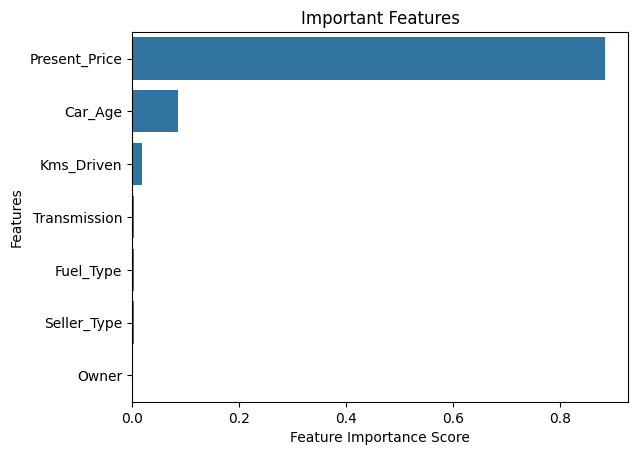

In [ ]:
importance = rf_model.best_estimator_.feature_importances_
importance_df = pd.DataFrame(importance, index=X.columns,
                      columns=["Importance"])
print(importance_df)
print()

import matplotlib.pyplot as plt
import seaborn as sns
feature_imp = pd.Series(rf_model.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()